In [31]:
#Import the necessary packages

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import asarray
#from google.colab.patches import cv2_imshow


In [32]:
with open('detection.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error",optimizer= adam , metrics = ['accuracy'])

In [33]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_e = tf.keras.models.model_from_json(json_savedModel)
model_e.load_weights('weights_emotions.hdf5')
model_e.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [34]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

In [35]:
def predict(img):       #combine the two model
    from PIL import Image
    from PIL import Image, ImageOps
    import matplotlib.pyplot as plt
    image = Image.open(img)
    new_image =image.resize((96,96))
    new_image= ImageOps.grayscale(new_image)
    new_image = asarray(new_image)
    new_image1 = new_image/255
    new_image1 = new_image1.reshape(1,96,96,1)
    #plt.imshow(new_image)
    
    df_predict = model.predict(new_image1)

  #Making prediction from the emotion model
    df_emotion = np.argmax(model_e.predict(new_image1), axis=-1)
 #Reshaping array from (856,) to (856,1)
    df_emotion = np.expand_dims(df_emotion, axis = 1)

  #Converting the predictions into a dataframe
    df_predict= pd.DataFrame(df_predict)#, columns= columns)

  #Adding emotion into the predicted dataframe
    df_predict['emotion'] = df_emotion

    return df_predict,new_image

In [36]:
my_image,image = predict("dipak1.jpg")

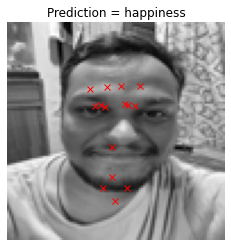

In [37]:
#Plotting the test images and their predicted keypoints and emotions
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}
#fig, axes = plt.subplots(1, 3, figsize = (24, 24))
#axes = axes.ravel()

for i in range(1):

    plt.imshow(image,cmap='gray')
    plt.title('Prediction = {}'.format(label_to_text[my_image['emotion'][i]]))
    plt.axis('off')
    for j in range(1,31,2):
            plt.plot(my_image.loc[i][j-1], my_image.loc[i][j], 'rx')